# Import General Packages and Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Import the Datafile as a dataframe

Dataset is found here, for a Ford Stay Alert:
https://www.kaggle.com/datasets/sivabalana/ford-stay-alert

In [16]:
# Data is split into Test and Train data from Kaggle. Train  data does not have the respective alertness column, thus we must split train data...
 
# ****THIS WILL HAVE TO CHANGE FOR EACH PERSON'S LOCATION OF THIS FILE AND THE LOCATION OF THE fordTrain.csv FILE****
path = "C:/Users/Jay/Documents/Github/MSE413-ML/Project/fordTrain.csv"
sens_train_df = pd.read_csv(path)
print(f"Shape of dataframe is: {sens_train_df.shape}")
print(f"Headings of the dataframe are:")

#P1 - P8  Represent Physicological Data
#E1 - E11 Represent Environmental Data
#V1 - V11 Represents Vehicular Data 
sens_train_df.head(10)

Shape of dataframe is: (604329, 33)
Headings of the dataframe are:


,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
5,0,5,0,34.3729,13.64440,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2016,0,13.4,0,4,14.7498
6,0,6,0,34.3851,10.16540,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2016,0,13.4,0,4,14.7578
7,0,7,0,34.4313,13.32700,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7729
8,0,8,0,34.4970,17.71240,1400,42.8571,0.290601,592,101.351,...,0.070,752,5.99375,0,2011,0,13.4,0,4,14.7835
9,0,9,0,34.5994,6.88282,1400,42.8571,0.290601,592,101.351,...,0.175,752,5.99375,0,2012,0,13.4,0,4,14.7757


## Data Discovery

array([[<Axes: title={'center': 'TrialID'}>,
        <Axes: title={'center': 'ObsNum'}>,
        <Axes: title={'center': 'IsAlert'}>,
        <Axes: title={'center': 'P1'}>, <Axes: title={'center': 'P2'}>,
        <Axes: title={'center': 'P3'}>],
       [<Axes: title={'center': 'P4'}>, <Axes: title={'center': 'P5'}>,
        <Axes: title={'center': 'P6'}>, <Axes: title={'center': 'P7'}>,
        <Axes: title={'center': 'P8'}>, <Axes: title={'center': 'E1'}>],
       [<Axes: title={'center': 'E2'}>, <Axes: title={'center': 'E3'}>,
        <Axes: title={'center': 'E4'}>, <Axes: title={'center': 'E5'}>,
        <Axes: title={'center': 'E6'}>, <Axes: title={'center': 'E7'}>],
       [<Axes: title={'center': 'E8'}>, <Axes: title={'center': 'E9'}>,
        <Axes: title={'center': 'E10'}>, <Axes: title={'center': 'E11'}>,
        <Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>],
       [<Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'cente

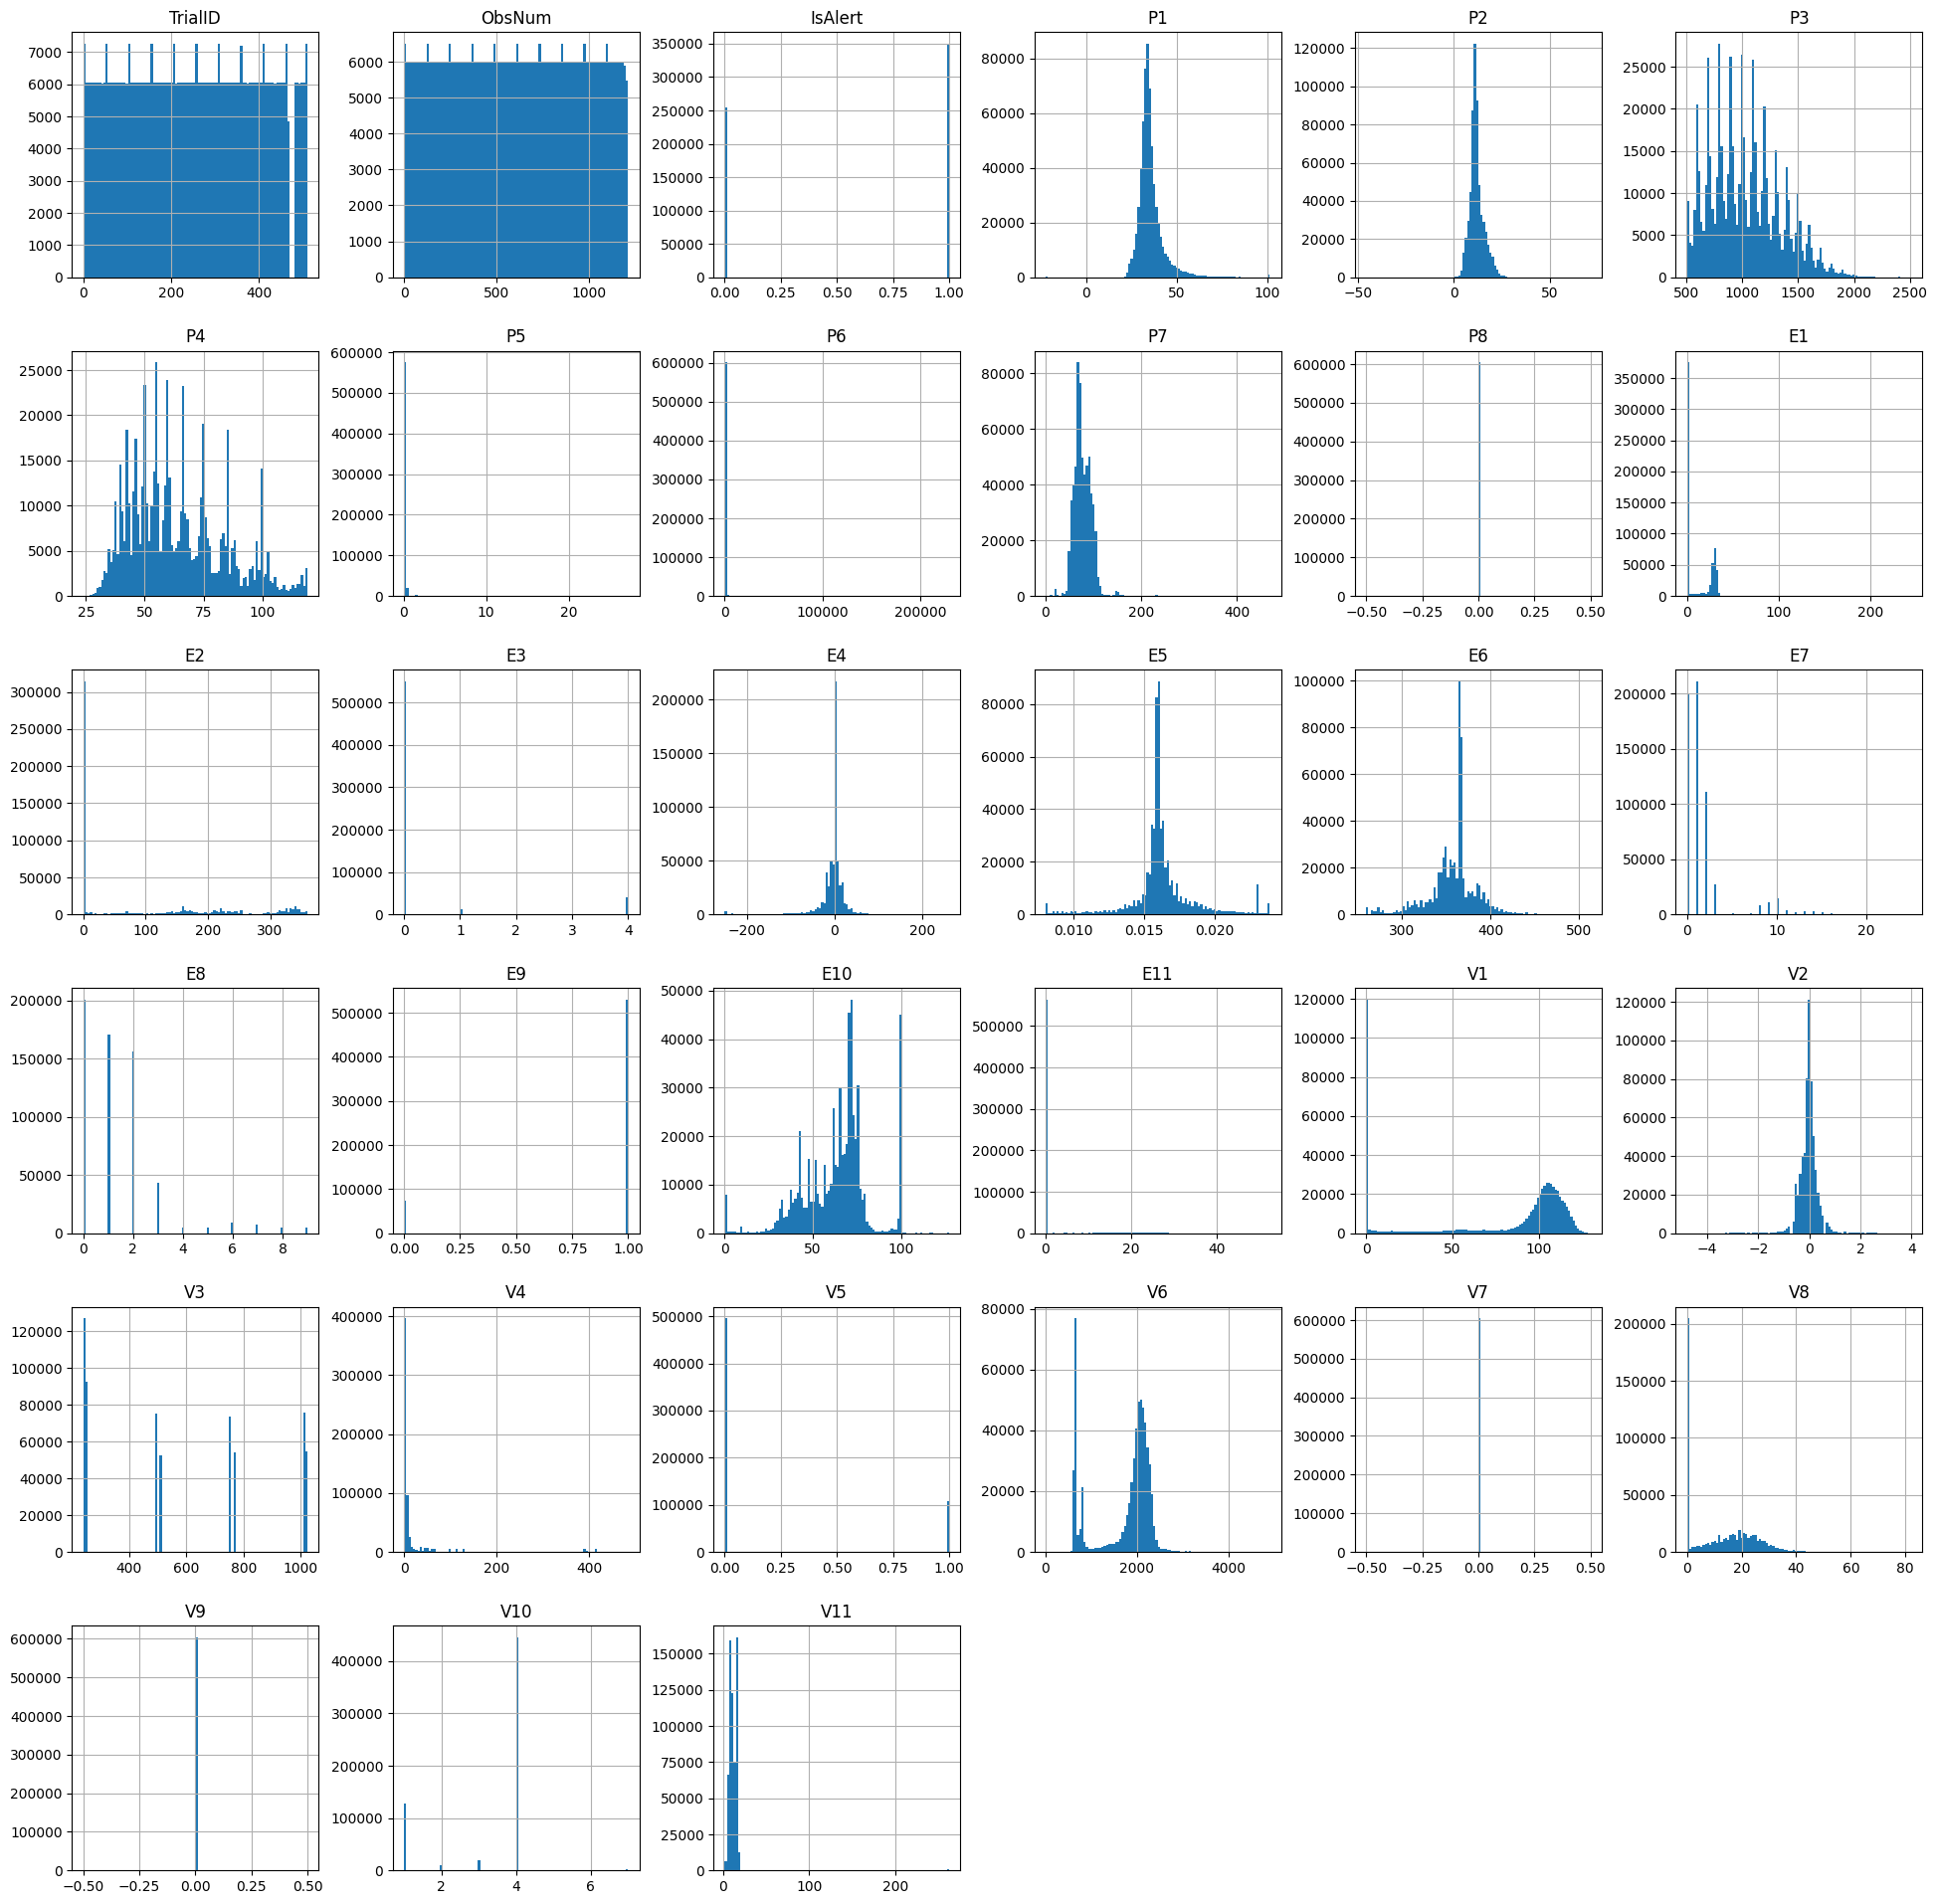

In [23]:
sens_train_df.hist(bins=100, figsize=(24,24))

In [32]:
corr_matrix = sens_train_df.corr()
is_alert_corr = corr_matrix['IsAlert']
is_alert_corr =is_alert_corr.abs().sort_values(ascending=False)
# Pretty bad correlation with these features. Namely, they're E9, E7, E8, V1, V10, V6, P7
# It seems Environmental matters a lot more, then vehicular, and then physiological. We can more accurately measure environment and vehicle, so this is good.
is_alert_corr

IsAlert    1.000000
E9         0.380353
E7         0.329722
E8         0.283440
V1         0.269967
V10        0.259607
V6         0.244150
P7         0.189796
E6         0.189198
V8         0.165550
E1         0.160830
E3         0.157973
V11        0.155722
TrialID    0.145816
E2         0.105495
V4         0.097022
E11        0.079002
E5         0.067453
E10        0.067051
V3         0.062000
V5         0.055429
V2         0.050740
E4         0.047992
P5         0.038160
P1         0.018361
P2         0.014383
P4         0.008177
P3         0.005168
ObsNum     0.005143
P6         0.000400
P8              NaN
V7              NaN
V9              NaN
Name: IsAlert, dtype: float64